<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%209/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/morphology.png', cv.IMREAD_GRAYSCALE)

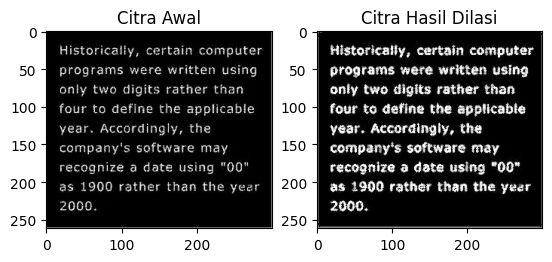

In [4]:
def dilasi(img):
    # Membuat kernel berukuran 3x3 dengan bentuk cross
    kernel = np.zeros((3, 3), dtype=np.uint8)
    kernel[1, :] = 1
    kernel[:, 1] = 1

    # Membuat citra hasil dilasi dengan operasi perulangan pada semua piksel
    # Citra di pinggir diberi padding dengan nilai piksel 0
    padded_img = np.pad(img, 1, mode='constant', constant_values=0)
    dilated_img = np.zeros_like(img)
    for i in range(1, padded_img.shape[0]-1):
        for j in range(1, padded_img.shape[1]-1):
            if padded_img[i, j] > 0:
                roi = padded_img[i-1:i+2, j-1:j+2]
                max_val = np.max(roi * kernel)
                dilated_img[i-1, j-1] = max_val

    return dilated_img

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')

# Melakukan operasi dilasi
dilated_img = dilasi(img)

# Menampilkan citra hasil dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


Kernel: 
[[0 1 0]
 [1 1 1]
 [0 1 0]]


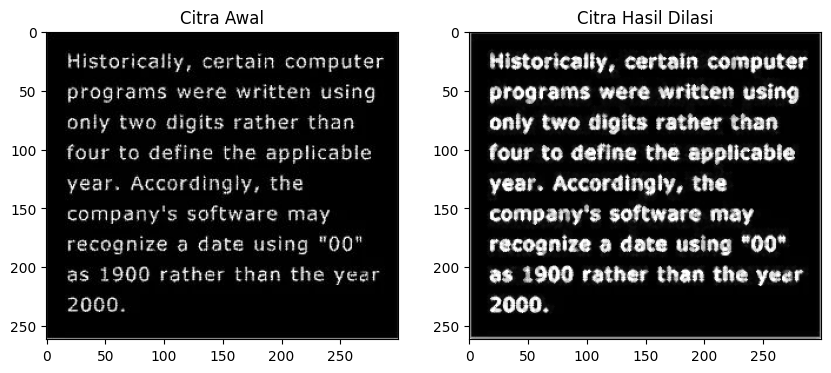

In [5]:
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)
dilation = cv.dilate(img, kernel, iterations=1)

# mencetak kernel
print("Kernel: ")
print(kernel)

# menampilkan gambar awal dan hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Citra Hasil Dilasi')
plt.show()

Kedua citra berbeda


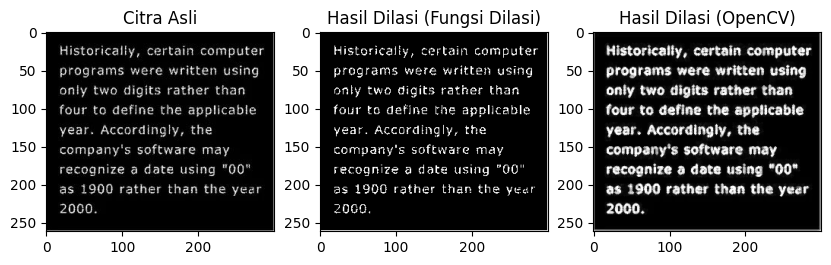

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dilasi(img):
    # Membuat kernel berukuran 3x3 dengan bentuk cross
    kernel = np.zeros((3, 3), dtype=np.int8)
    kernel[1, :] = 1
    kernel[:, 1] = 1

    # Thresholding citra untuk memperjelas garis-garis
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Membuat citra hasil dilasi dengan operasi perulangan pada semua piksel
    # Citra di pinggir diberi padding dengan nilai piksel 0
    padded_img = np.pad(img, 1, mode='constant', constant_values=0)
    dilated_img = np.zeros_like(img)
    for i in range(1, padded_img.shape[0]-1):
        for j in range(1, padded_img.shape[1]-1):
            if padded_img[i, j] > 0:
                roi = padded_img[i-1:i+2, j-1:j+2]
                max_val = np.max(roi * kernel)
                dilated_img[i-1, j-1] = max_val

    return dilated_img

# Membaca citra grayscale
img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/morphology.png', cv2.IMREAD_GRAYSCALE)

# Melakukan operasi dilasi dengan fungsi dilasi yang telah dibuat
dilated_img1 = dilasi(img)

# Melakukan operasi dilasi dengan menggunakan library OpenCV
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
dilated_img2 = cv2.dilate(img, kernel, iterations=1)

# Menampilkan citra asli dan hasil dilasi dari kedua metode
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Citra Asli')
ax[1].imshow(dilated_img1, cmap='gray')
ax[1].set_title('Hasil Dilasi (Fungsi Dilasi)')
ax[2].imshow(dilated_img2, cmap='gray')
ax[2].set_title('Hasil Dilasi (OpenCV)')

# Membandingkan setiap piksel dari kedua citra
if np.array_equal(dilated_img1, dilated_img2):
    print('Kedua citra sama')
else:
    print('Kedua citra berbeda')

plt.show()